# Проверка гипотез по увеличению выручки в крупном интернет-магазине.

**Описание проекта.**

Подготовлен список гипотез для увеличения выручки интернет-магазина. Требуется приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Приоритезация гипотез.

В файле `/datasets/hypothesis.csv` содержится 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

### Изучение данных из файла и его предобработка.

**Импорт библиотек.**

In [1]:
# Импорт библиотек.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math as mth
import datetime as dt
import scipy.stats as stats

**Загрузка данных в переменную.**

In [2]:
# Загрузка данных в переменную.
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
# Увеличение максимальной ширины колонок.
pd.set_option('max_colwidth', 150)

**Предварительный анализ данных.**

In [3]:
# Процедура для предварительного анализа данных.
def data_view(df):
    display(df.info())
    display(df.head(5))
    display(df.tail(5))
    display(df.describe())
    display('Количество пустых строк:', df.isna().sum())
    display('Количество дублирующихся строк:', df.duplicated().sum())

In [4]:
# Рассмотрим данные в таблице hypothesis.
data_view(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


'Количество пустых строк:'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Количество дублирующихся строк:'

0

**Приведение названий столбцов к нижнему регистру.**

In [5]:
# Напишем цикл для приведения названий столбцов к нижнему регистру.
for df in [hypothesis]:
    df.columns = df.columns.str.lower()

In [6]:
# Проверим результат.
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Вывод.**

В таблице `hypothesis` содержатся 9 гипотез со следующими колонками:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Названия столбцов были приведены к нижнему регистру для удобства дальнейшей работы с таблицей.

### Примение фреймворка `ICE` для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [7]:
# Расчитываем ICE для гипотез.
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [8]:
# Вывод столбцов hypothesis и ICE с сортировкой по убыванию приоритета.
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE:

- Запустить акцию, дающую скидку на товар в день рождения.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

### Примение фреймворка `RICE` для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [9]:
# Расчитываем RICE для гипотез.
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [10]:
# Вывод столбцов hypothesis и RICE с сортировкой по убыванию приоритета.
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Запустить акцию, дающую скидку на товар в день рождения

### Вывод по разделу "Приоритезация гипотез".

Поскольку `RICE` включает в себя такой параметр как "охват пользователей" ('Reach'), то именно он оказал влияние на перестановку гипотез по степени приоритетности.

Первая пятерка гипотез совпадает у `ICE` и `RICE`, но в разной последовательности. Занявшая по `ICE` первое место гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась на пятое место по `RICE`, так как охват у нее оказался самым низким - всего 1 балл. Это вполне логично, так как данная акция доступна пользователям раз в год, что существенно сужает возможности ее применения.

Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с третьего на первое место, так как затрагивает практически всех пользователей. Гипотеза по охвату набрала 10 баллов.

Еще одна гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" вышла на второе место с пятого также за счет высокого балла по охвату (8 баллов).

Гипотезы фреймворка `RICE`, набравшие наибольшее количество баллов, являются наиболее приоритетными так как учитывают охват пользователей. 

## Анализ A/B-теста.

Проведен A/B-тест и получены результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv.`

`/datasets/orders.csv`:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

`/datasets/visitors.csv`:

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Изучение данных из файлов и их предобработка.

**Загрузка данных в переменные.**

In [11]:
# Загрузка данных в переменные.
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Предварительный анализ данных.**

In [12]:
# Рассмотрим данные в таблице orders.
data_view(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


'Количество пустых строк:'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Количество дублирующихся строк:'

0

Переименуем столбцы `visitorId` и `transactionId`. Приведем столбец date к формату даты.

In [13]:
# Рассмотрим данные в таблице visitors.
data_view(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Количество пустых строк:'

date        0
group       0
visitors    0
dtype: int64

'Количество дублирующихся строк:'

0

Приведем столбец date к формату даты.

**Предобработка данных.**

In [14]:
# Переименуем столбцы в таблице orders.
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace = False)

In [15]:
# Приведение столбца date в формат даты в таблице orders.
orders['date']= pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [16]:
# Проверим результат.
data_view(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transaction_id,visitor_id,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


'Количество пустых строк:'

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

'Количество дублирующихся строк:'

0

In [17]:
# Приведение столбца date в формат даты в таблице visitors.
visitors['date']= pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [18]:
# Проверим результат.
data_view(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Количество пустых строк:'

date        0
group       0
visitors    0
dtype: int64

'Количество дублирующихся строк:'

0

In [19]:
# Проверим, есть ли пользователи, которые встречаются в обеих группах.
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

58

В данных есть 58 пользователей, встречающихся в обеих группах. Удалим их, чтобы не было дополнительных искажений при проведении тестирования.

In [20]:
# Посмотрим на id пользователей, которые попали в обе группы.
user_dubl = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())
user_dubl

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [21]:
# Переведем массив в список.
user_dubl = user_dubl.tolist()

In [22]:
# Исключим пользователей попавших в обе группы из таблицы orders.
orders = orders[~orders['visitor_id'].isin(user_dubl)]

In [23]:
# Проверим, остались ли пользователи, которые встречаются в обеих группах.
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

0

**Вывод.**

- Изучили данные в предоставленных файлах.
- Переименовали столбцы `visitorId` и `transactionId` в таблице `orders`.
- Привели к формату даты данные в столбце `date` из таблиц `orders` и `visitors`.
- Удалили пользователей попавших в обе исследуемые группы.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [24]:
# Создадим таблицу groups_dates с уникальными парами значений 'date' и 'group', таблицы orders
groups_dates = orders[['date','group']].drop_duplicates()

Создадим таблицу `aggregated_orders`, содержащую:

- дату
- группу A/B-теста
- число уникальных заказов в группе теста по указанную дату включительно
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно
- суммарную выручку заказов в группе теста по указанную дату включительно

In [25]:
# Создадим таблицу aggregated_orders.
aggregated_orders = groups_dates.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique,
         'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Создадим таблицу `aggregated_visitors`, содержащую:

- дату
- группу A/B-теста
- количество уникальных посетителей в группе теста по указанную дату включительно

In [26]:
# Создадим таблицу aggregated_visitors.
aggregated_visitors = groups_dates.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
# Создадим таблицу cumulative_data, объединив aggregated_orders и aggregated_visitors.
cumulative_data = aggregated_orders.merge(aggregated_visitors, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [28]:
# Таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_data_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [29]:
# Таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

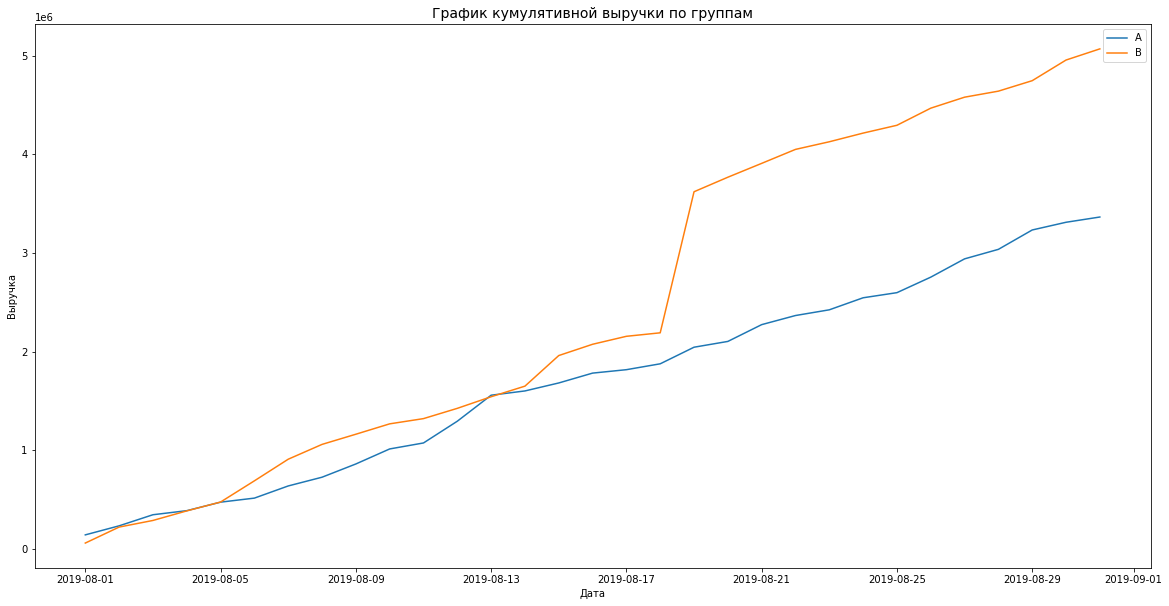

In [30]:
# Строим график кумулятивной выручки по группам.
plt.figure(figsize=(20,10))

# Строим график выручки группы А
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам', size=14)
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend();

Сегмент `В` с минимальным отрывом лидировал практически весь тест. В определенные дни был на одном уровне с сегментом `А`. 
Примерно 18.08.2021 выручка у сегмента `В` резко подскочила вверх. Возможно, количество заказов и/или очень дорогих товаров в заказах, у данного, сегмента значительно выросло. Выручка сегмента `А` росла практически равномерно весь месяц.

### Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

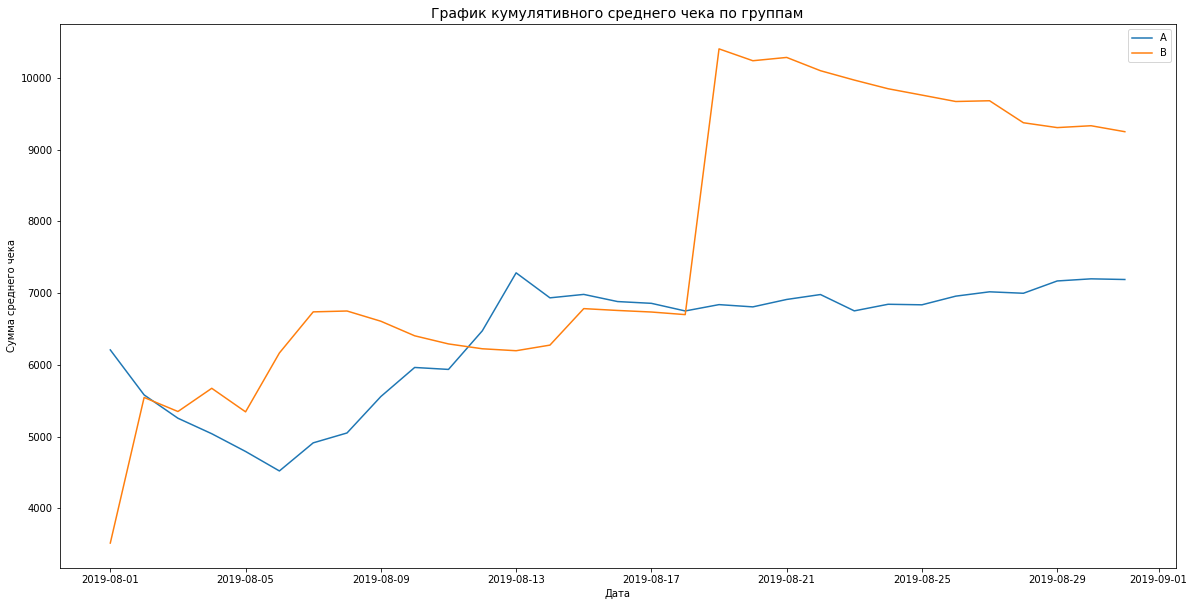

In [31]:
# Строим график кумулятивного среднего чека по группам.
plt.figure(figsize=(20,10))

# Строим график среднего чека группы А
plt.plot(cumulative_data_a['date'], cumulative_data_a['revenue']/cumulative_data_a['orders'], label='A')
# Строим график среднего чека группы B
plt.plot(cumulative_data_b['date'], cumulative_data_b['revenue']/cumulative_data_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам', size=14)
plt.xlabel("Дата")
plt.ylabel("Сумма среднего чека")
plt.legend();

Кумулятивное значение среднего чека сегмента `В` также сильно выросло 18.08.2021. После чего наблюдается небольшое снижение.
Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты. Скорее всего, были чрезмерно крупные заказы, которые могут влиять на результаты.

### Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

In [32]:
# Объединяем данные по группам тестирования в одной таблице.
cumulative_data_merge = cumulative_data_a.merge(
    cumulative_data_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

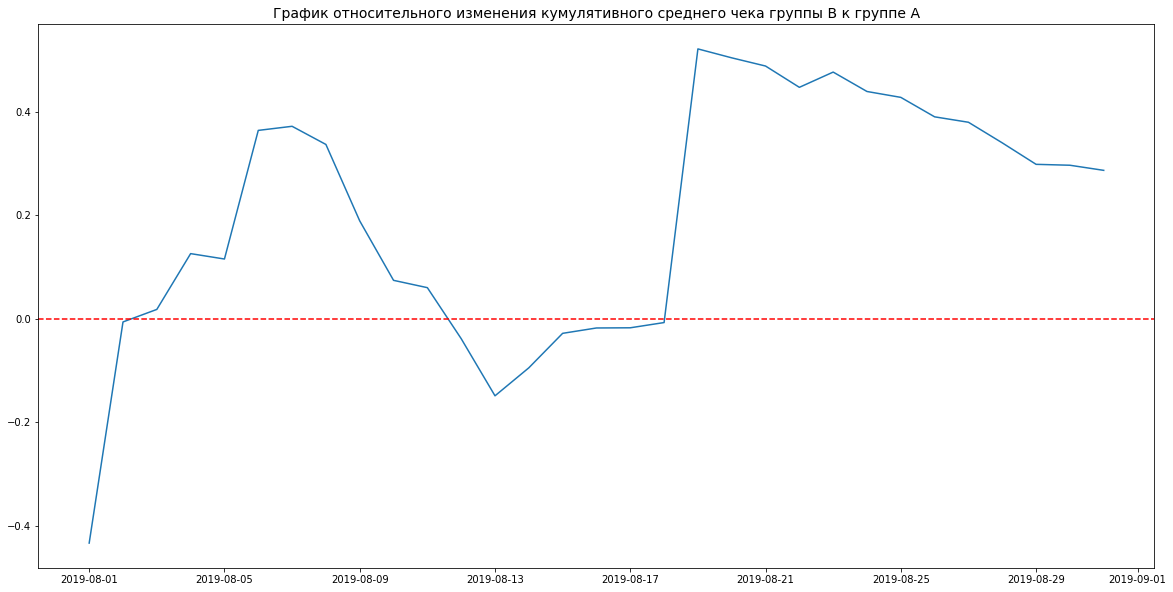

In [33]:
# Строим график относительного изменения кумулятивного среднего чека группы B к группе A.
plt.figure(figsize=(20,10))
plt.plot(cumulative_data_merge['date'], (cumulative_data_merge['revenue_b']/cumulative_data_merge['orders_b'])
         /(cumulative_data_merge['revenue_a']/cumulative_data_merge['orders_a'])-1);
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size=14)

# Добавляем ось X.
plt.axhline(y=0, color='red', linestyle='--');

Наблюдаем резкие колебания графика по некоторым датам. Видимо, именно в эти даты совершены аномальные заказы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

In [34]:
# Считаем кумулятивную конверсию.
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

In [35]:
# Отделяем данные по группе A.
cumulative_conv_a = cumulative_data[cumulative_data['group']=='A']

In [36]:
# Отделяем данные по группе B.
cumulative_conv_b = cumulative_data[cumulative_data['group']=='B']

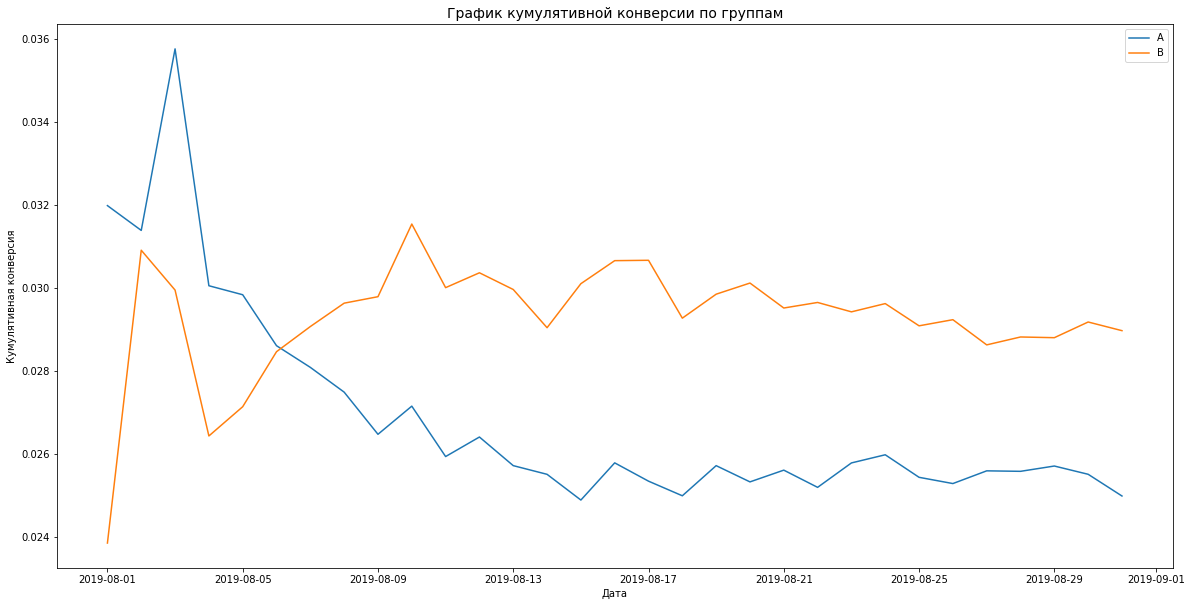

In [37]:
# Cтроим график.
plt.figure(figsize=(20,10))
plt.plot(cumulative_conv_a['date'], cumulative_conv_a['conversion'], label='A');
plt.plot(cumulative_conv_b['date'], cumulative_conv_b['conversion'], label='B');
plt.title('График кумулятивной конверсии по группам', size=14)
plt.xlabel("Дата")
plt.ylabel("Кумулятивная конверсия")
plt.legend()

У обеих групп вначале теста наблюдается резкий скачек с пиком 2-3 числа, после чего идет резкое снижение. У группы А снижение более серьезное, в то время как у группы B показатели выглядят лучше. Однако, смотреть на предварительные результаты в первую неделю теста не стоит, так как группы эксперимента малы, и каждый новый пользователь сильно меняет картину, **в последующие недели, когда метрики начинают стабилизироваться, можно оценивать тренды, динамику и прочее.**  В целом, конверсия у группы В оказалась лучше группы А.

### Постром график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

Построим график относительно различия кумулятивной конверсии группы B к группе A и добавим пунктирную линию оси X чёрного цвета со значением оси Y = 0. И ещё одну линию оси X серого цвета со значением оси Y = 0.15.

In [38]:
# Объединим таблицы cumulative_conv_a и cumulative_conv_b методом merge().
merged_cumulative_conversion = cumulative_conv_a[['date','conversion']].merge(
    cumulative_conv_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

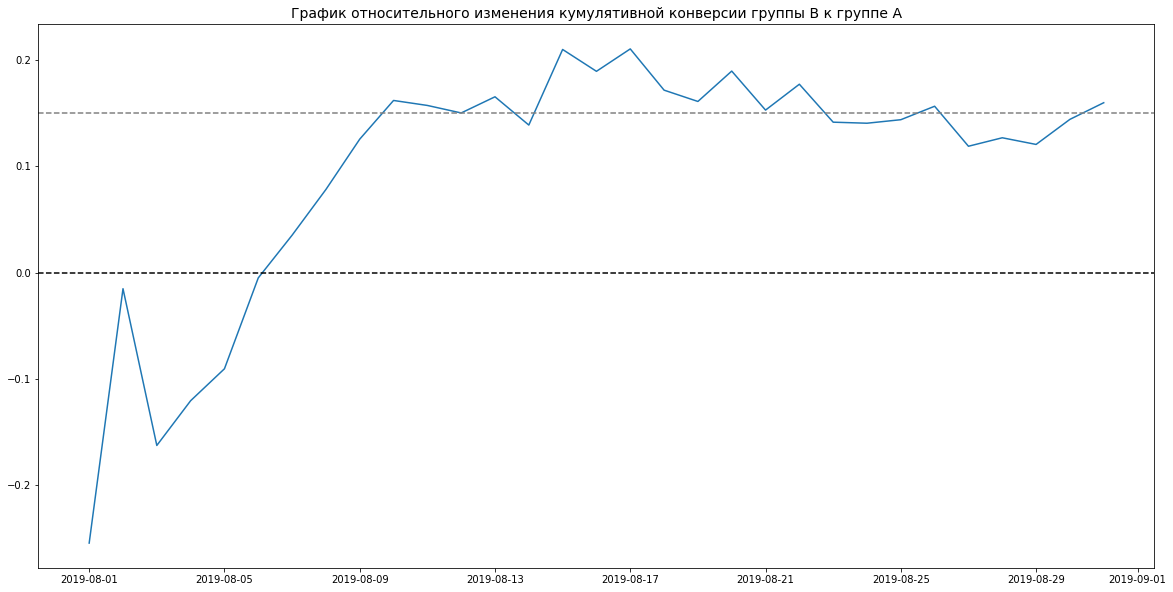

In [39]:
# Cтроим график.
plt.figure(figsize=(20,10))
plt.plot(merged_cumulative_conversion['date'], 
         merged_cumulative_conversion['conversionB']/merged_cumulative_conversion['conversionA']-1, 
         label= "Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', size=14)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

В начале теста группа `В` в проигрывала группе `А`. С 6 августа группа `B` вырвалась вперед. С 8 августа разница конверсии между группами меняется от 15 до 20%. К концу месяца разница между конверсией по группам находится в районе 15%.

### Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

In [40]:
# Создадим таблицу по заказам.
orders_per_user = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False
                                                                           ).agg({'transaction_id' : pd.Series.nunique})
orders_per_user.columns = ['visitor_id','orders']

In [41]:
# Посмотрим данные в получившейся таблице.
orders_per_user.sort_values(by='orders',ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


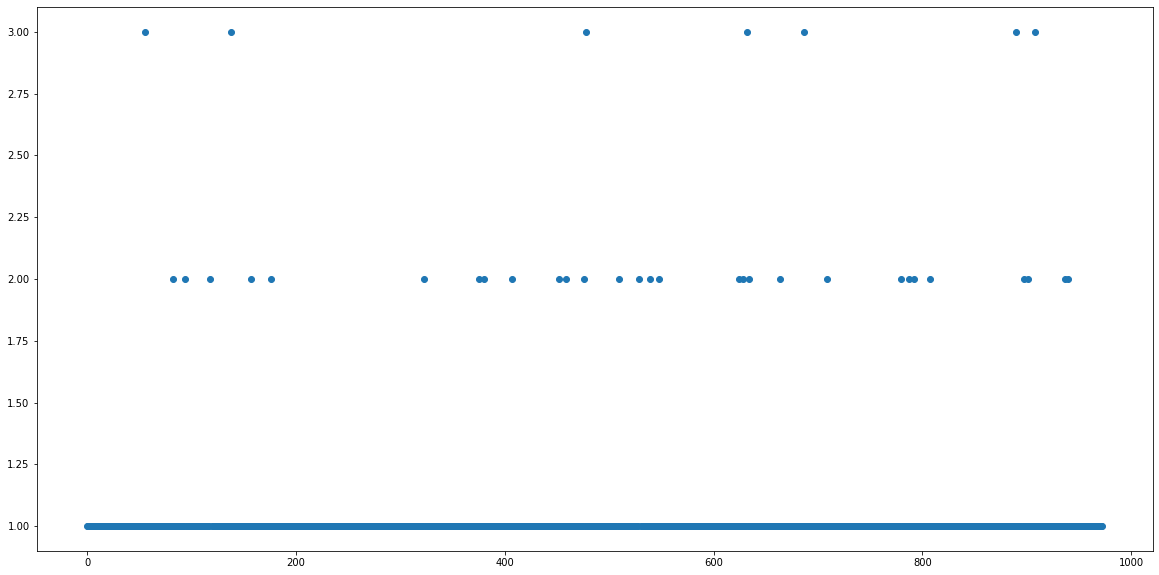

In [42]:
# Построим точечный график.
x_values = pd.Series(range(0,len(orders_per_user)))
plt.figure(figsize=(20,10))
plt.scatter(x_values, orders_per_user['orders'])

По графику видно что абсолютное большинство пользователей совершают 1 заказ. Только единичные пользователи делают несколько заказов.

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [43]:
# Посчитаем перцентили количества заказов на пользователя.
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 1.00
99 перцентиль: 2.00


In [44]:
# Посмотрим максимальное значение числа покупок.
print('Максимальное количество заказов: %.0f' %  (orders_per_user['orders'].max()))

Максимальное количество заказов: 3


Менее 1% пользователей сделали 3 заказа.  Все значения за пределами 99 процентиля считаем аномальными.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [45]:
# Отсортируем заказы по убыванию выручки.
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


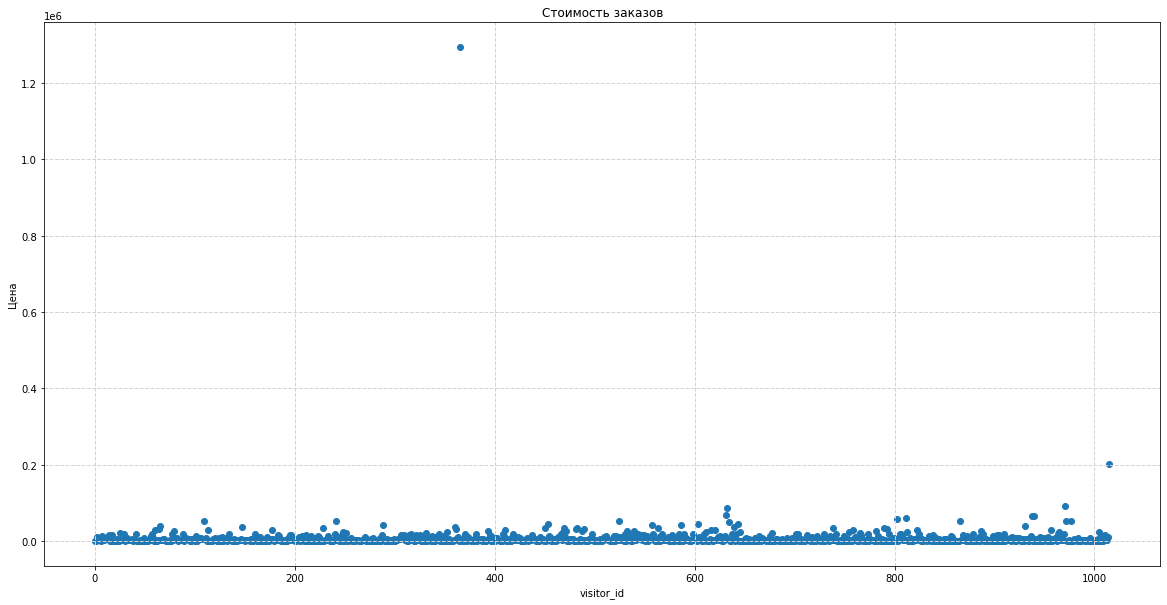

In [46]:
# Построим точечный график по выручке с заказов.
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20,10))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.ylabel('Цена')
plt.xlabel('visitor_id')
plt.show()

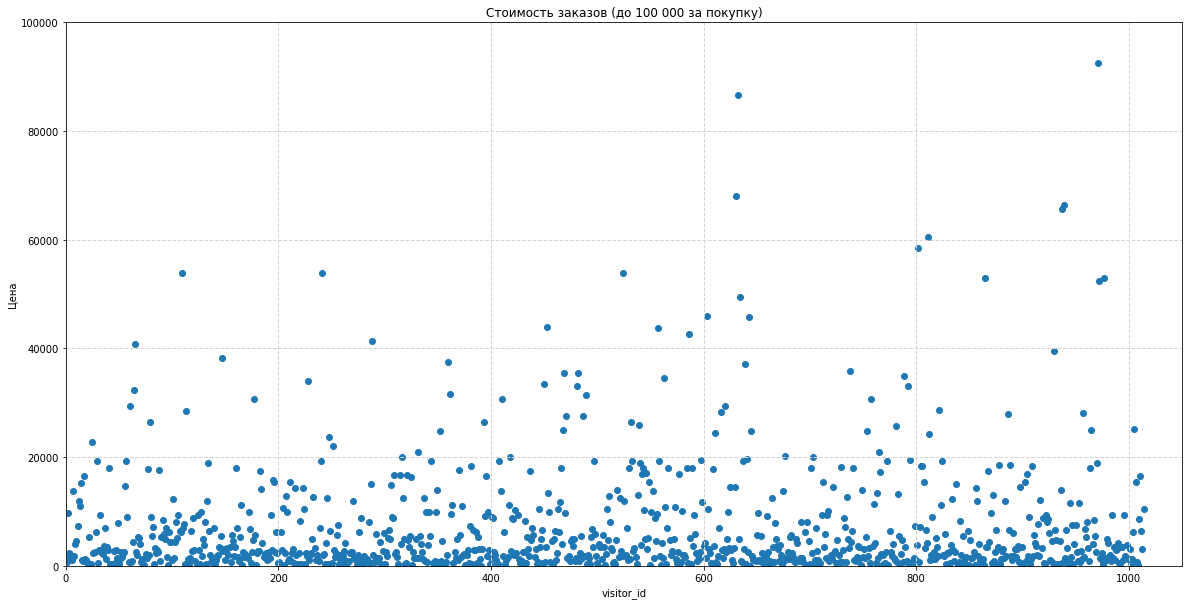

In [47]:
# Построим точечный график по выручке с заказов (до 10 000 за покупку).
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(20,10))
plt.grid(color='lightgrey', linestyle='--', linewidth=1)
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1050, 0, 100000])
plt.title('Стоимость заказов (до 100 000 за покупку)')
plt.ylabel('Цена')
plt.xlabel('visitor_id')
plt.show()

Видим 2 аномальных заказа на 202740 и 1294500 у.е. Эти заказы сделаны пользователем группы `B`. Скорее всего именно из-за них видны резкие скачки по группе `B` на графиках рассмотренных ранее(кумулятивная выручка и т.д.) Видно что основная часть заказов составляет менее 20000 у.е.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [48]:
# Посчитаем перцентили стоимости заказа.
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 17990.00
95 перцентиль: 26785.00
99 перцентиль: 53904.00


In [49]:
# Посмотрим максимальную стоимость заказа.
print('Максимальный доход от заказов: %.0f' %  (orders['revenue'].max()))

Максимальный доход от заказов: 1294500


In [50]:
# Посмотрим на этот заказ.
orders[orders['revenue'] == 1294500]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [51]:
# Посмотрим на заказы этого покупателя.
orders[orders['visitor_id'] == 1920142716]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


Аномально большой единичный заказ, вызвавший скачек на рассматриваемых выше графиках по группе `B`.

Все значения за пределами 99 процентиля считаем аномальными.

### Посчитем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

In [52]:
# Создадим таблицу для подсчета конверсии по группам.
#conversion = (orders.groupby('group').agg({'transaction_id':'count'}
                                        # ).rename(columns={'transaction_id':'orders'})
            # ).join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [53]:
# Добавим столбец с конверсией.
#conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [54]:
# Посмотрим получившуюся таблицу.
#conversion

Сформулируем гипотезы:

- **H0:** Конверсия в группе `A` равна конверсии в группе `B`.
- **H1:** Конверсия в группе `A` не равна конверсии в группе `B`.

~Воспользуемся Z-критерием для разности двух долей.~

Воспользуемся критерием Манна-Уитни.

<div class="alert alert-block alert-success">

    
### Комментарий от ревьюера v_2

👍🏻
    
</div>

In [55]:
# Проверим гипотезу.

#alpha=0.05

#purchases = np.array(conversion['orders'])
#leads = np.array(conversion['visitors'])

#p1 = purchases[0] / leads[0]
#p2 = purchases[1] / leads[1]

#combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
#difference = p1-p2

#z_value = difference / mth.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
#distr = stats.norm(0,1)
#p_value = (1 - distr.cdf(abs(z_value))) * 2

#print('p-значение: ', p_value)

#if (p_value < alpha):
    #print("Отвергаем нулевую гипотезу")
#else:
   # print("Не получилось отвергнуть нулевую гипотезу")

In [56]:
orders_usersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_usersA.columns = ['visitor_id', 'orders']
orders_usersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_usersB.columns = ['visitor_id', 'orders']
print('Кол-во покупателей в группе A: {}'.format(len(orders_usersA)))
print('Кол-во покупок в группе А: {}'.format(orders_usersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(orders_usersB)))
print('Кол-во покупок в группе B: {}'.format(orders_usersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))


# Cоставим списки кол-ва заказов sampleA и sampleB со всеми пользователями (в том числе и не купившими) по группам.
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(orders_usersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(orders_usersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([orders_usersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([orders_usersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-значение: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Кол-во покупателей в группе A: 445
Кол-во покупок в группе А: 468
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 528
Кол-во покупок в группе B: 548
Кол-во посетителей в группе B: 18916

Относительный прирост конверсии группы B по отношению к группе A: 0.160
p-значение: 0.011018084110014696
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем. Конверсия в группе `A` не равна конверсии в группе `B`. Относительный прирост конверсии группы `B` по отношению к группе `A` 16%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:

- **H0:** Средний чек группы `A` равен среднему чеку группы `B`.
- **H1:** Средний чек группы `A` превосходит средний чек группы `B`.

Воспользуемся критерием Манна-Уитни. 

Cначала посмотрим средний чек по группам `А` и `В`.

In [57]:
# Средний чек группы А
print('Средний чек группы А: %.2f' %  (orders[orders['group']=='A']['revenue'].mean()))

Средний чек группы А: 7189.44


In [58]:
# Средний чек группы B
print('Средний чек группы В: %.2f' %  (orders[orders['group']=='B']['revenue'].mean()))

Средний чек группы В: 9249.95


In [59]:
# Проверим гипотезу.

print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

Относительное изменение среднего чека в группе B по отношению группы A: 0.287
p-значение:  0.8294908998149533
Не получилось отвергнуть H0: вывод о различии сделать нельзя


Средний чек группы `B` оказался больше. Но в средних чеках между группами отсутствуют статистически значимые различия.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

In [60]:
# Создадим переменную с границей аномальных заказов.
orders_per_user_perc_clear = np.percentile(orders_per_user['orders'], [99])
orders_per_user_perc_clear = int(orders_per_user_perc_clear)
# Создадим переменную с границей аномальной выручкой с заказа.
orders_revenue_clear =  np.percentile(orders['revenue'], [99])
orders_revenue_clear = int(orders_revenue_clear)

In [61]:
# Создадим список пользователей с аномальным количеством заказов.
clear_orders_num = orders_per_user[orders_per_user['orders'] > orders_per_user_perc_clear]['visitor_id'].to_list()

In [62]:
# Создадим список пользователей с аномальными суммами заказов.
clear_revenue = orders[orders['revenue'] > orders_revenue_clear]['visitor_id'].to_list()

In [63]:
# Создадим таблицу без пользователей по которым были выявлены аномалии.
clear_orders = orders[~orders['visitor_id'].isin(clear_orders_num)]
clear_orders = orders[~orders['visitor_id'].isin(clear_revenue)]

In [64]:
# Посмотрим получившуюся таблицу.
clear_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [65]:
# Создадим таблицу для подсчета конверсии по группам по очищенным данным.
# conversion_clear = (clear_orders.groupby('group').agg({'transaction_id':'count'}
                                                    # ).rename(columns={'transaction_id':'orders'})
                  # ).join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [66]:
# Добавим столбец с конверсией.
# conversion_clear['conversion'] = conversion_clear['orders'] / conversion_clear['visitors']

In [67]:
# Посмотрим получившуюся таблицу.
# conversion_clear

Сформулируем гипотезы:

- **H0:** Конверсия в группе `A` равна конверсии в группе `B`.
- **H1:** Конверсия в группе `A` не равна конверсии в группе `B`.

~Воспользуемся Z-критерием для разности двух долей.~

Воспользуемся критерием Манна-Уитни.

In [68]:
# Проверим гипотезу.

#alpha=0.05

#purchases = np.array(conversion_clear['orders'])
#leads = np.array(conversion_clear['visitors'])

#p1 = purchases[0] / leads[0]
#p2 = purchases[1] / leads[1]

#combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
#difference = p1-p2

#z_value = difference / mth.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
#distr = stats.norm(0,1)
#p_value = (1 - distr.cdf(abs(z_value))) * 2

#print('p-значение: ', p_value)

#if (p_value < alpha):
#    print("Отвергаем нулевую гипотезу")
#else:
#    print("Не получилось отвергнуть нулевую гипотезу")

In [69]:
clear_orders_usersA = clear_orders[clear_orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
clear_orders_usersA.columns = ['visitor_id', 'orders']
clear_orders_usersB = clear_orders[clear_orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
clear_orders_usersB.columns = ['visitor_id', 'orders']
print('Кол-во покупателей в группе A в очищенных данных: {}'.format(len(clear_orders_usersA)))
print('Кол-во покупок в группе А в очищенных данных: {}'.format(clear_orders_usersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B в очищенных данных: {}'.format(len(clear_orders_usersB)))
print('Кол-во покупок в группе B в очищенных данных: {}'.format(clear_orders_usersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))


# Cоставим списки кол-ва заказов sampleA и sampleB со всеми пользователями (в том числе и не купившими) по группам.
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(clear_orders_usersA))):
    list_orders_1.append(0)
clear_orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(clear_orders_usersB))):
    list_orders_2.append(0)
clear_orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

clear_sampleA = pd.concat([clear_orders_usersA['orders'], clear_orders_by_non_purchased_users_A], axis=0)
clear_sampleB = pd.concat([clear_orders_usersB['orders'], clear_orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A в очищенных данных: {:.3f}'.format(clear_sampleB.mean()/clear_sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(clear_sampleA, clear_sampleB)
print('p-значение: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Кол-во покупателей в группе A в очищенных данных: 440
Кол-во покупок в группе А в очищенных данных: 463
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B в очищенных данных: 524
Кол-во покупок в группе B в очищенных данных: 544
Кол-во посетителей в группе B: 18916

Относительный прирост конверсии группы B по отношению к группе A в очищенных данных: 0.164
p-значение: 0.0096632725139359
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем. Конверсия в группе A не равна конверсии в группе B и в очищенных данных. Относительный прирост конверсии группы `B` по отношению к группе `A` в очищенных данных 16.4%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:

- **H0:** Средний чек группы `A` равен среднему чеку группы `B`.
- **H1:** Средний чек группы `A` превосходит средний чек группы `B`.

Воспользуемся критерием Манна-Уитни. 

Cначала посмотрим средний чек по группам `А` и `В`.

In [70]:
# Средний чек группы А
print('Средний чек группы А: %.2f' %  (clear_orders[clear_orders['group']=='A']['revenue'].mean()))

Средний чек группы А: 6504.55


In [71]:
# Средний чек группы А
print('Средний чек группы B: %.2f' %  (clear_orders[clear_orders['group']=='B']['revenue'].mean()))

Средний чек группы B: 6298.83


In [72]:
# Проверим гипотезу.

print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
clear_orders[clear_orders['group']=='B']['revenue'].mean()/clear_orders[clear_orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05

results = stats.mannwhitneyu(clear_orders[clear_orders['group']=='A']['revenue'], clear_orders[clear_orders['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

Относительное изменение среднего чека в группе B по отношению группы A: -0.032
p-значение:  0.9006884356560738
Не получилось отвергнуть H0: вывод о различии сделать нельзя


После очистки данных средний чек стал меньше. Средний чек группы `A` стал больше среднего чека группы `B`. В средних чеках между группами в очищенных данных все так же отсутствуют статистически значимые различия.

### Примем решение по результатам теста.

Хоть и различий по среднему чеку между группами `A` и `B` выявить не удалось, была выявлена лучшая конверсия пользователей по группе `B` как при исследовании "сырых" данных(лучше на ~16.9%~ 16%) так и "очищенных"(лучше на ~14.9%~ 16.4%). Тест конечно можно было бы продлить, пока данные на графиках не станут более ровными, но бизнес не всегда может себе это позволить. Учитывая полученные данные можно принять решение остановить тест и зафиксировать победу группы `B`

## Общий вывод по проекту.

В исследовании проанализирован список гипотез для увеличения выручки интернет - магазина, а так же запущен A/B-тест и проанализированы его результаты.

**Была выполнена предобработка предоставленных данных:**

- Привели столбцы с датами к формату datetime
- Привели названия столбцов к нижнему регистру
- Были выявлены 58 пользователей которые были включены как в группу `A`, так и в группу `B`. Для чистоты теста данные по таким пользователям не учитывались и были удалены.

**Были исследован список гипотез, для приоритизации использовались фреймворки `ICE` и `RICE`:**

Поскольку `RICE` включает в себя такой параметр как "охват пользователей" ('Reach'), то именно он оказал влияние на перестановку гипотез по степени приоритетности.

Первая пятерка гипотез совпадает у `ICE` и `RICE`, но в разной последовательности. Занявшая по `ICE` первое место гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась на пятое место по `RICE`, так как охват у нее оказался самым низким - всего 1 балл. Это вполне логично, так как данная акция доступна пользователям раз в год, что существенно сужает возможности ее применения.

Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с третьего на первое место, так как затрагивает практически всех пользователей. Гипотеза по охвату набрала 10 баллов.

Еще одна гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" вышла на второе место с пятого также за счет высокого балла по охвату (8 баллов).

Гипотезы фреймворка `RICE`, набравшие наибольшее количество баллов, являются наиболее приоритетными так как учитывают охват пользователей. 


Итого, в соответствии с оценкой `RICE` отделу маркетинга, в первую очередь, рекомендуется обратить внимение на следующие гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**Был проведен A/B тест и проанализированы его результаты:**

Во всех проведенных исследованиях по группам `A` и `B` пользователи группы `B` показали лучшие результаты. Но были выявлены скачки на графиках которые могли говорить о присутствии аномальных данных. 

В ходе дальнеших исследований эти аномалии были выявлены. Причиной оказались несколько аномально больших заказов в группе `B`.
Далее были проведены исследования на статистическую значимость различий в среднем чеке заказа и статистическую значимость различий в конверсии между группами пользователей по "сырым" данным, так и "очищенным".

Хоть и различий по среднему чеку между группами `A` и `B` выявить не удалось, была выявлена лучшая конверсия пользователей по группе `B` как при исследовании "сырых" данных(лучше на ~16.9%~ 16%) так и "очищенных"(лучше на ~14.9%~ 16.4%). Учитывая полученные данные можно принять решение остановить тест и зафиксировать победу группы `B`.

Результат А/B теста:

- По конверсии между группами A и B (как по "сырым" данным, так и по "очищенным") существуют статистически значимые различия.
- По среднему чеку между группами A и B (как по сырым данным, так и по очищенным) нет статистически значимых различий.

Рекомендуется остановить тест и считать его успешным. Конверсия до покупателя в группе В статистически значимо выше. Следует отметить, что при этом средний чек между группами статистически значимо не отличается. Возможно имеет смысл поработать над увеличением среднего чека в будущем.